<h1>Metoda končnih razlik<h1>

$V = \frac{1}{2} E I \sum_{i=0}^{n-1}(\frac{\theta_{i+1}-\theta_{i}}{h})^2 h + P \sum_{i=0}^n \cos{\theta_i} h $

Z uporabo brezdimenzijskih spremenljivk

$v=\frac{1}{n+1} \frac{V L}{E I} = \frac{1}{2} \sum_{i=0}^{n-1} (\theta_{i+1} - \theta_{i})^2 + \frac{p}{(n+1)^2} \sum_{i=0}^{n} \cos{\theta_{i}}$
                                

$p = \frac{P L^2}{E I}$

         Current function value: 4.523563
         Iterations: 66
         Function evaluations: 6887
         Gradient evaluations: 215


C:\Users\vangr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


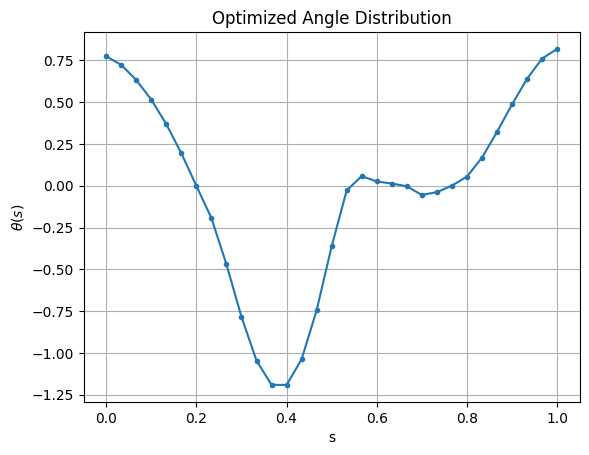

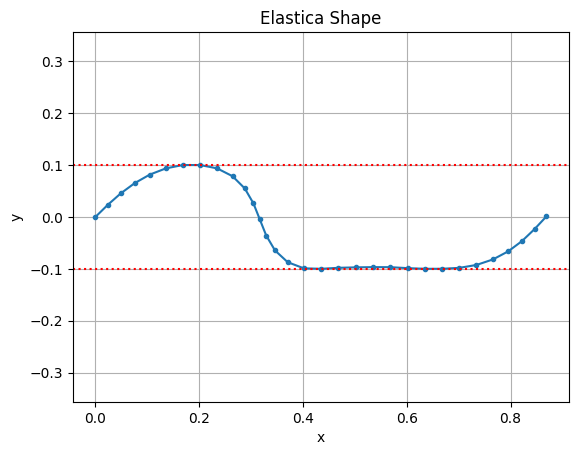

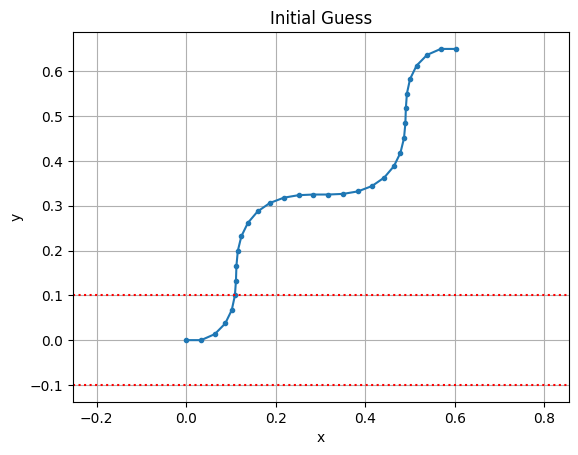

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters
penalty_coeff1 = 1e2
penalty_coeff2 = 1e3
n = 30  # number of segments
p = 150  # dimensionless force
c = 0.1  # distance beween channel edge and zero line

# arrays
k = np.pi / 1
# theta0 = c/0.35*np.ones(-1, 1, n+1) # initial guess for θ (length n+1)
s, h = np.linspace(0, 1, n+1, retstep=True) # discretized arc-length
theta0 = np.sin(k*s) + np.sin(3*k*s)

# Energy functional
def energy_functional(theta, p, h, c, penalty_coeff1, penalty_coeff2):
    n = len(theta) - 1
    diffs = np.diff(theta)  # theta[i+1] - theta[i], length n
    v = 0.5 * np.sum(diffs**2) + p / (n+1)**2 * np.sum(np.cos(theta))
    
    # dx = h * np.cos(theta[:n])  # increments in x direction for each segment
    dy = h * np.sin(theta[:n+1])  # increments in y direction for each segment

    # x = np.concatenate(([0], np.cumuative_sum(dx)))
    y = np.concatenate(([0], np.cumulative_sum(dy)))

    penalty = penalty_coeff1*np.sum(np.maximum(0, y**2 - c**2)) + penalty_coeff2*y[-1]**2

    return v + penalty

# Minimize energy
res = minimize(fun=energy_functional, x0=theta0, args=(p, h, c, penalty_coeff1, penalty_coeff2), method="BFGS", options={"disp": True})

# Extract optimized theta
res_theta = res.x

# Plot theta(s)
plt.figure()
if n <= 30:
    plt.plot(s, res_theta, marker=".")
else:
    plt.plot(s, res_theta)
plt.xlabel("s")
plt.ylabel(r"$\theta(s)$")
plt.title("Optimized Angle Distribution")
plt.grid(True)
plt.show()

# Reconstruct curve (x, y)
x = [0]
y = [0]
for i in range(n+1):
    x.append(x[-1] + h * np.cos(res_theta[i]))
    y.append(y[-1] + h * np.sin(res_theta[i]))

x = np.array(x)
y = np.array(y)

# Plot shape
plt.figure()
if n <= 30:
    plt.plot(x, y, marker=".")
else:
    plt.plot(x, y)

plt.axhline(y=c, color='r', linestyle="dotted")
plt.axhline(y=-c, color='r', linestyle="dotted")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Elastica Shape")
plt.axis("equal")
plt.grid(True)
plt.show()

# Reconstruct curve (x, y)
x = [0]
y = [0]
for i in range(n+1):
    x.append(x[-1] + h * np.cos(theta0[i]))
    y.append(y[-1] + h * np.sin(theta0[i]))

x = np.array(x)
y = np.array(y)

# Plot shape
plt.figure()
if n <= 30:
    plt.plot(x, y, marker=".")
else:
    plt.plot(x, y)

plt.axhline(y=c, color='r', linestyle="dotted")
plt.axhline(y=-c, color='r', linestyle="dotted")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Initial Guess")
plt.axis("equal")
plt.grid(True)
plt.show()
